<a href="https://colab.research.google.com/github/Haeune-Jeon/CV/blob/main/5_%EB%AF%B8%EC%84%B8%EC%A1%B0%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from IPython.display import Image as _Imgdis
from IPython.display import display

In [ ]:
folder = '/content/drive/MyDrive/pytest_img/cats_dogs'
files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder,f))]
print("Working wirh {0} images".format(len(files)))

Working wirh 60 images


cat.2.jpg


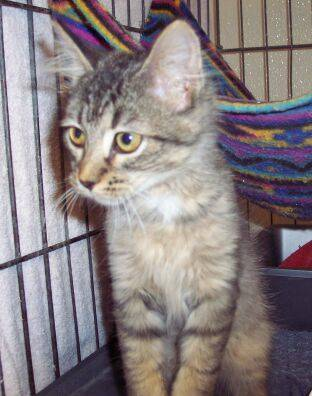

cat.24.jpg


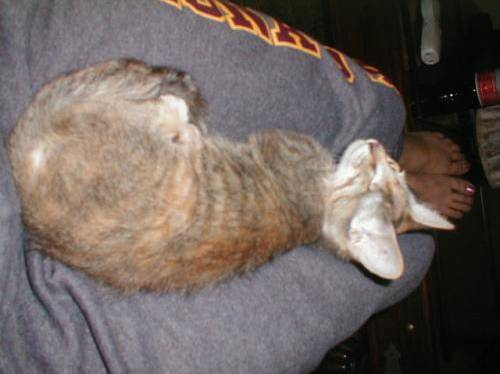

In [ ]:
# 이미지 확인
for i in range(0,2):
  print(files[i])
  display(_Imgdis(filename=folder+'/'+files[i], width=120, height=160))

In [ ]:
# 이미지 라벨 추출
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
file_names=[]
file_labels=[]

for _file in files:
  file_names.append(_file)
  label_start = 0
  label_end = _file.find(".")
  label_str = _file[label_start:label_end]

  if label_str == 'cat':
    file_labels.append(0)
  elif label_str == 'dog':
    file_labels.append(1)
  else:
    print("Error!")

print("Files in folder:%d" %len(file_names))

Files in folder:60


In [ ]:
os.chdir(folder)

image_height = 224
image_width = 224
channels = 3

dataset = np.ndarray(shape=(len(file_names), image_height, image_width, channels), dtype=np.int32)
print(dataset.shape)

(60, 224, 224, 3)


In [ ]:
import os

if not os.path.exists(os.path.join(folder,'new/')):
  os.makedirs(os.path.join(folder, 'new/'))

In [ ]:
# 이미지 사이즈 변경
from PIL import Image

for count, item in enumerate(file_names):
  img = load_img(file_names[count])
  img = img.resize((image_height, image_width), Image.Resampling.LANCZOS)
  img.save(fp = os.path.join(folder,'new/') + file_names[count])

In [ ]:
# 넘파이 배열로 변환
for count, item in enumerate(file_names):
  img = load_img(os.path.join(folder,'new/') + file_names[count])
  img_array = img_to_array(img)
  dataset[count] = img_array

  if count % 500 == 0:
    print(f"{count} images to array")
print("All images to array")

0 images to array
All images to array


(60, 224, 224, 3)
1


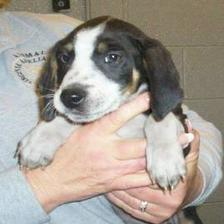

In [ ]:
# 변환 결과 확인
print(dataset.shape)
print(file_labels[30])

display(_Imgdis(filename=os.path.join(folder,'new/' + "/" + files[30])))

In [ ]:
# 훈련데이터와 테스트데이터 분리
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(dataset, file_labels, test_size=0.2)
print("Train set size: {0}, Test set size : {1}".format(len(train_images), len(test_images)))

Train set size: 48, Test set size : 12


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
model = VGG19()
model.summary()

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 설계
# include_top = False를 통해 완전연결층을 제거하고, 사전학습된 가중치를 가져온다.
vgg = VGG19(input_shape=[224,224,3], weights='imagenet', include_top=False)

vgg.trainable = True
for layer in vgg.layers[:5]:
  layer.trainable = False

# 결과를 Flatten하여 Dense 층에 붙일 수 있게 한다.
x = Flatten()(vgg.output)

# Flatten된 결과를 Dense층에 입력하여, 분류기 형태가 되게 한다.
# 이진분류이므로 출력층 노드는 1, activation function은 sigmoid, 다중 분류에서는 sofrmax를 사용한다
prediction = Dense(1, activation='sigmoid')(x)

# Funcitonal API를 이용하여 모델을 구성한다.
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,049,473 (76.48 MB)

 Trainable params: 19,936,897 (76.05 MB)

 Non-trainable params: 112,576 (439.75 KB)

In [ ]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
# 모델 컴파일 및 훈련
import tensorflow as tf
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00003),
    metrics=['acc'])
history = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 50s 50s/step - acc: 0.5417 - loss: 6.6286 - val_acc: 0.6667 - val_loss: 4.7925
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 35s 35s/step - acc: 0.6042 - loss: 4.2960 - val_acc: 0.5833 - val_loss: 1.9271
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - acc: 0.7708 - loss: 0.5891 - val_acc: 0.8333 - val_loss: 0.5670
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - acc: 1.0000 - loss: 0.0011 - val_acc: 0.8333 - val_loss: 0.5711
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - acc: 1.0000 - loss: 8.4464e-04 - val_acc: 0.8333 - val_loss: 0.5747
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step - acc: 1.0000 - loss: 6.8382e-04 - val_acc: 0.8333 - val_loss: 0.5781
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - acc: 1.0000 - loss: 5.7475e-04 - val_acc: 0.8333 - val_loss: 0.5813
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step - acc: 1.0000 - loss: 4.9419e-04 - val_acc: 0.8333 - val_loss: 0.5842
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - acc: 1.0000 - loss: 4

In [ ]:
# 정확도 확인
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print("Accuracy of each epoch:", np.round(val_acc))
print()
print("Validation Accuracy of each epoch:", np.round(val_acc))

Accuracy of each epoch: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]

Validation Accuracy of each epoch: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [ ]:
# 손실값 확인
print("Loss of each epoch:", np.round(loss,3))
print()
print("Validation Loss of each epoch:", np.round(val_loss,3))

Loss of each epoch: [6.629e+00 4.296e+00 5.890e-01 1.000e-03 1.000e-03 1.000e-03 1.000e-03
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00]

Validation Loss of each epoch: [4.793 1.927 0.567 0.571 0.575 0.578 0.581 0.584 0.587 0.589 0.591 0.593
 0.595 0.597 0.598 0.6   0.602 0.603 0.605 0.606 0.608 0.609 0.611 0.612
 0.613 0.615 0.616 0.617 0.619 0.62  0.621 0.623 0.624 0.625 0.627 0.628
 0.629 0.631 0.632 0.633 0.634 0.636 0.637 0.638 0.639 0.64  0.642 0.643
 0.644 0.646]


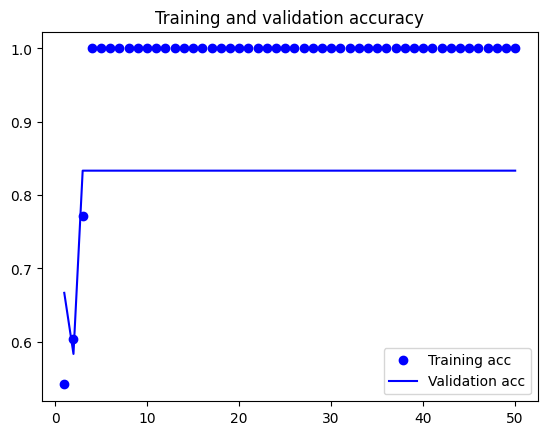

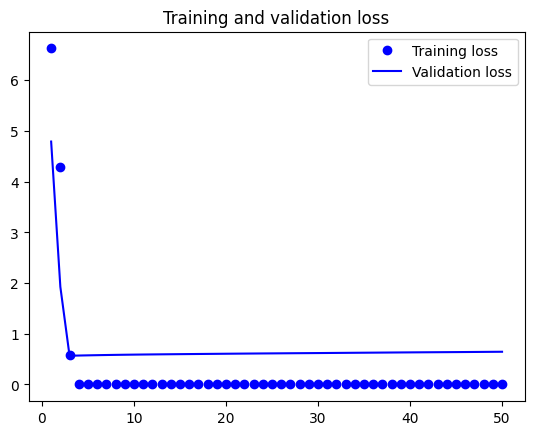

In [ ]:
# 그래프 확인
import matplotlib.pyplot as plt
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()